In [2]:
# Import required packages

import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [3]:
# Read in the winequalityN.csv data
wine_df = pd.read_csv('winequalityN.csv')

# Check the data by display the first 5 rows
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data Cleaning

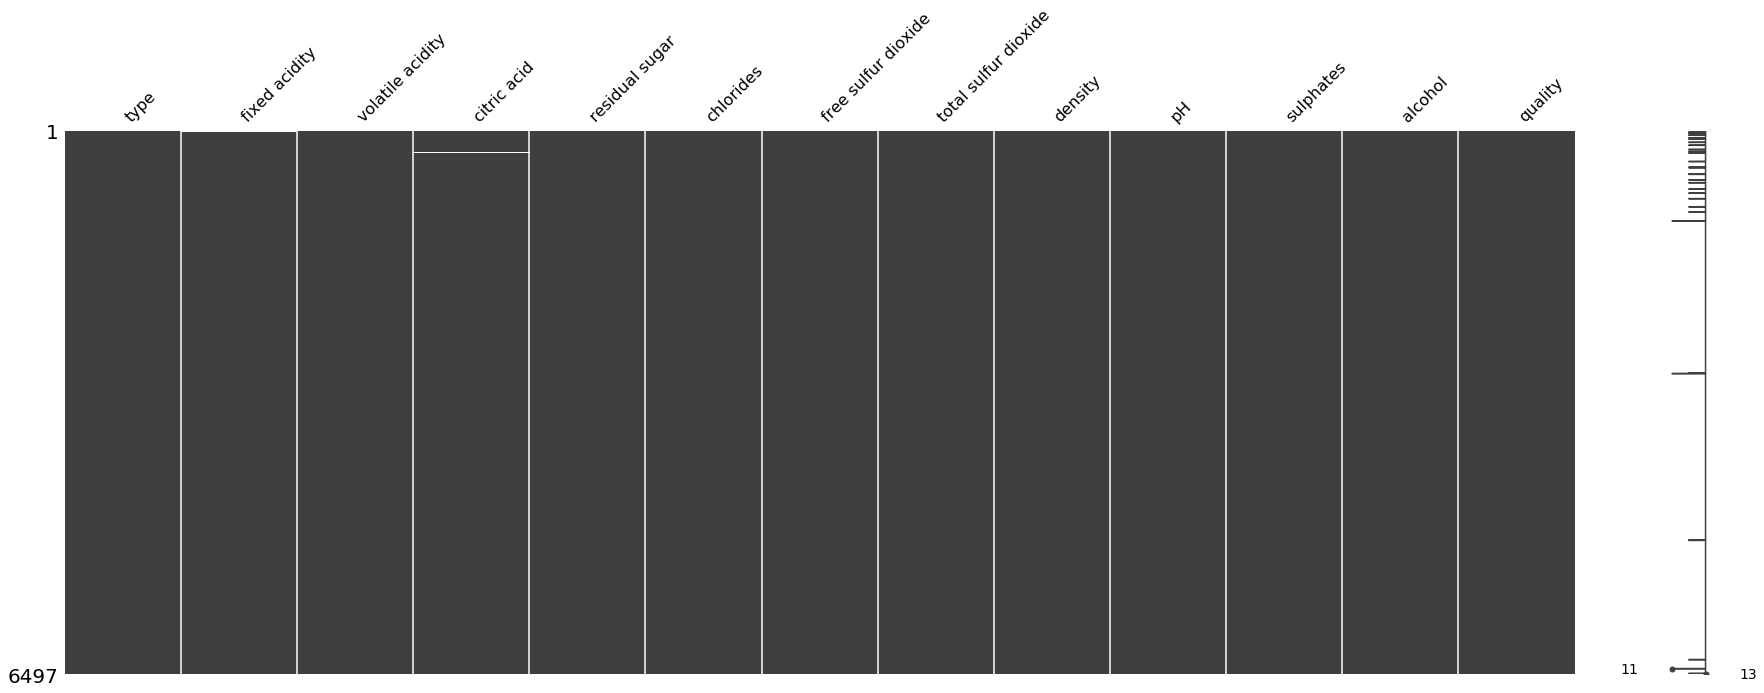

In [4]:
# Check for missing values
# Plot graphic of missing values
missingno.matrix(wine_df, figsize = (30,10))

In [5]:
# get the number of missing data points per column
missing_values_count = wine_df.isnull().sum()

# look at the # of missing points in all the columns
print(missing_values_count)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


From the graph and the count of missing values it can bes een that some missing values are not easily seen in the matrix, however there are missing values in the fixed acidity, voltile acidity, citric acid, residual sugar, chlorides, pH and sulphates. The data needs to be cleaned which will be done by replacing missing values with the mean

In [6]:
# Many columns have missing data, so a function is defined
def replace_with_mean(name_of_column, df):
    # Replacing all missing values for missing data
    # replacing null values with a "?"
    df[f"{name_of_column}"].fillna("?", inplace = True)

    # Fill in missing data with the mean of the prices
    temp_df = df[df[f"{name_of_column}"]!= '?'] # Gather all data that does not include the null values
    mean = temp_df[f"{name_of_column}"].astype(float).mean()  #Determine mean of column
    print(f'The mean for {name_of_column} was determined to be: {mean}')
    df[f"{name_of_column}"] = df[f"{name_of_column}"].replace('?',mean).astype(float)

In [7]:
# make a list of columns with missing data
missing_data_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']

# Use the list and the defined function to fill in the missing data with the mean
for column in missing_data_list:
    replace_with_mean(column, wine_df)

The mean for fixed acidity was determined to be: 7.2165793124710795
The mean for volatile acidity was determined to be: 0.33969101556480247
The mean for citric acid was determined to be: 0.3187218971358124
The mean for residual sugar was determined to be: 5.444326404926885
The mean for chlorides was determined to be: 0.05604157043879931
The mean for pH was determined to be: 3.218395499383475
The mean for sulphates was determined to be: 0.5312151547820745


In [8]:
# Check the data again to see if all missing values have been fixed
# get the number of missing data points per column
missing_values_count = wine_df.isnull().sum()

# look at the # of missing points in all the columns
print(missing_values_count)

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Exploring the data

<Figure size 720x720 with 0 Axes>

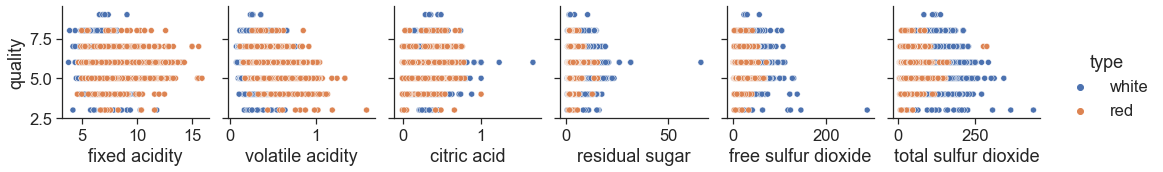

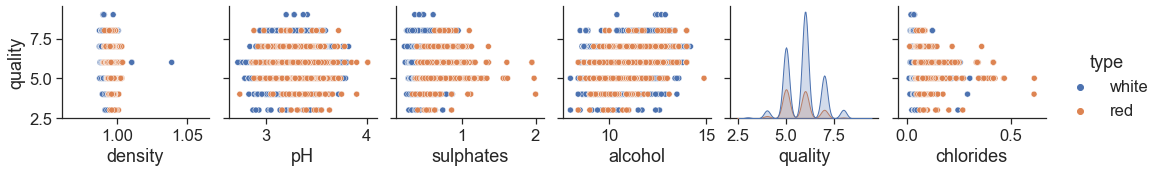

In [9]:
# Compraring white wine to red wine
# Check the different sets of data using  pairplots
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['quality'],
             x_vars= ['fixed acidity', 'volatile acidity', 'citric acid', 
                      'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['quality'],
             x_vars= ['density', 'pH', 'sulphates', 'alcohol', 'quality', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

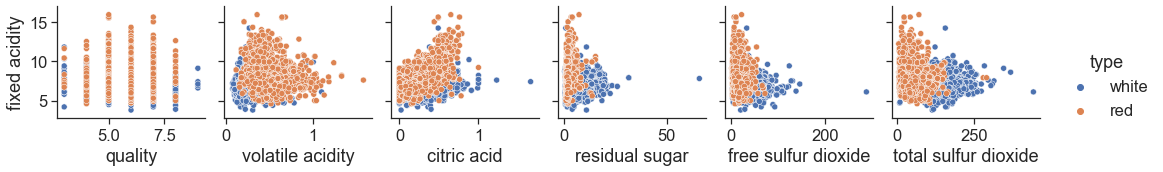

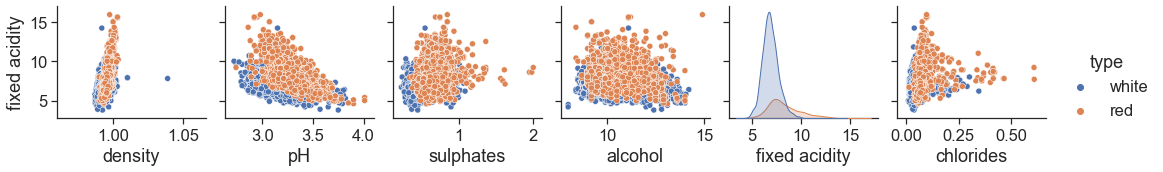

In [10]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['fixed acidity'],
             x_vars= ['quality', 'volatile acidity', 'citric acid', 
                      'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['fixed acidity'],
             x_vars= ['density', 'pH', 'sulphates', 'alcohol', 'fixed acidity', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

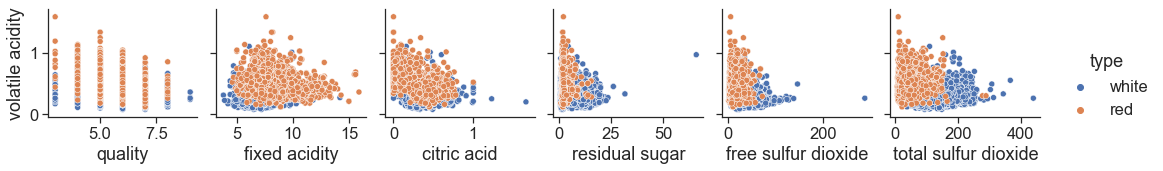

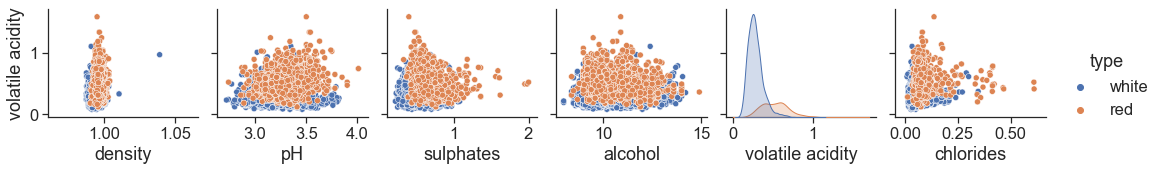

In [11]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['volatile acidity'],
             x_vars= ['quality', 'fixed acidity', 'citric acid', 
                      'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['volatile acidity'],
             x_vars= ['density', 'pH', 'sulphates', 'alcohol', 'volatile acidity', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

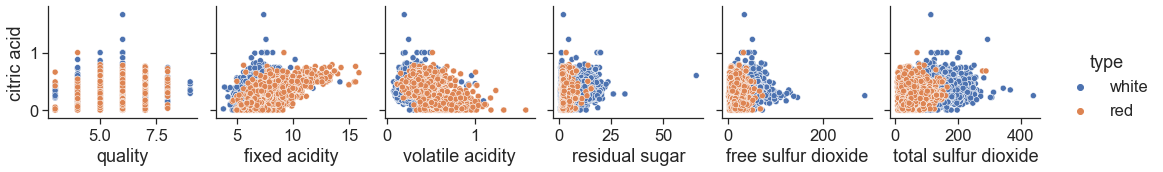

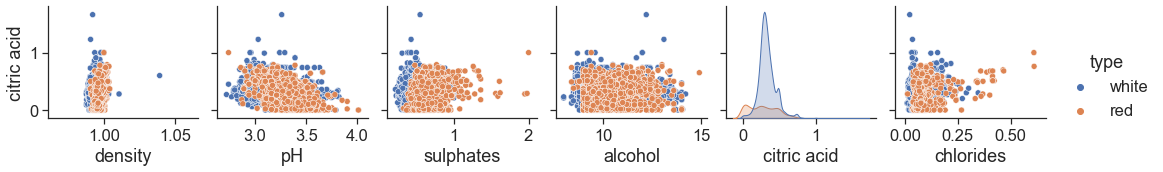

In [12]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['citric acid'],
             x_vars= ['quality', 'fixed acidity', 'volatile acidity', 
                      'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['citric acid'],
             x_vars= ['density', 'pH', 'sulphates', 'alcohol', 'citric acid', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

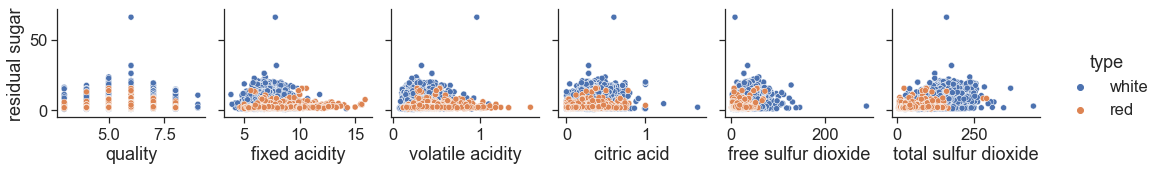

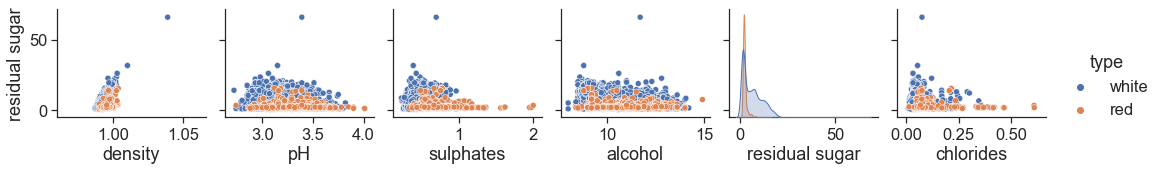

In [13]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['residual sugar'],
             x_vars= ['quality', 'fixed acidity', 'volatile acidity', 
                      'citric acid', 'free sulfur dioxide', 'total sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['residual sugar'],
             x_vars= ['density', 'pH', 'sulphates', 'alcohol', 'residual sugar', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

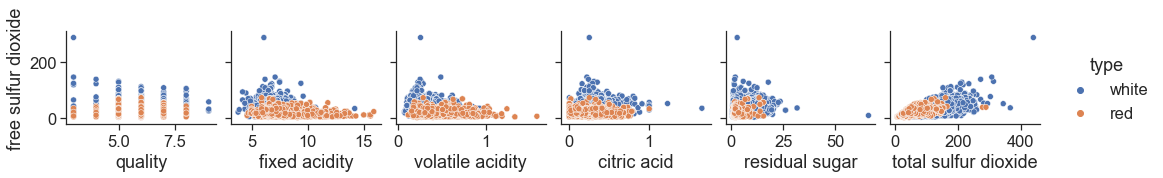

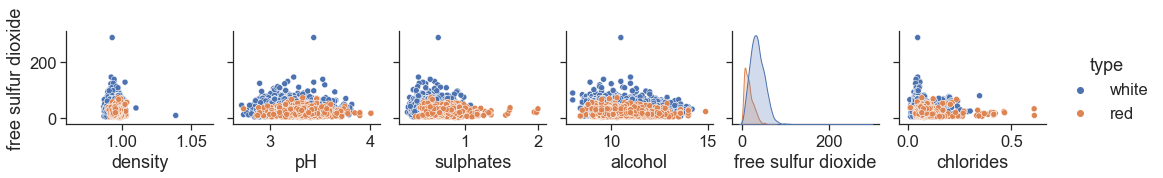

In [14]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['free sulfur dioxide'],
             x_vars= ['quality', 'fixed acidity', 'volatile acidity', 
                      'citric acid', 'residual sugar', 'total sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['free sulfur dioxide'],
             x_vars= ['density', 'pH', 'sulphates', 'alcohol', 'free sulfur dioxide', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

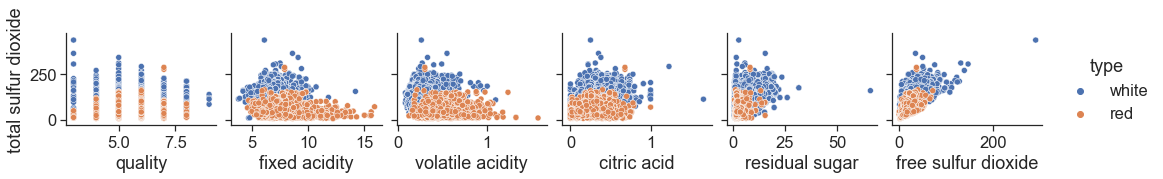

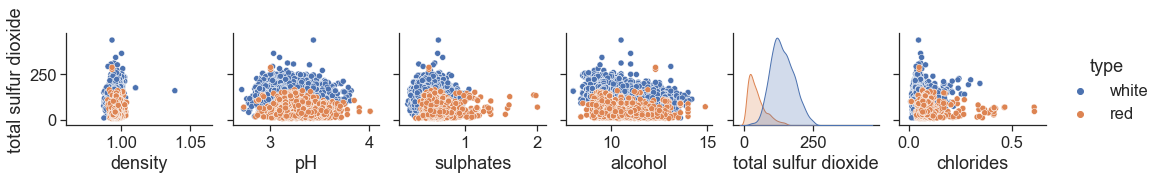

In [15]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['total sulfur dioxide'],
             x_vars= ['quality', 'fixed acidity', 'volatile acidity', 
                      'citric acid', 'residual sugar', 'free sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['total sulfur dioxide'],
             x_vars= ['density', 'pH', 'sulphates', 'alcohol', 'total sulfur dioxide', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

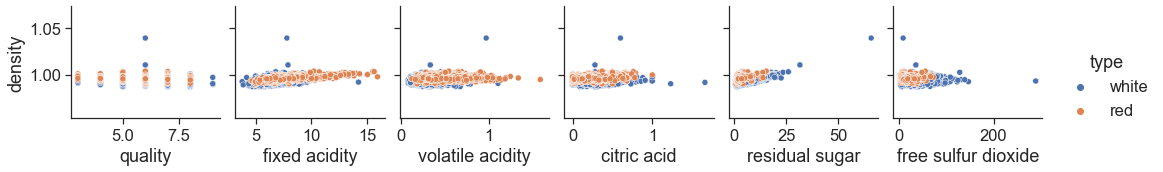

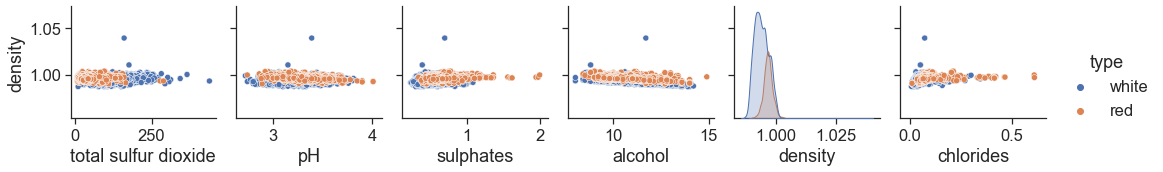

In [16]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['density'],
             x_vars= ['quality', 'fixed acidity', 'volatile acidity', 
                      'citric acid', 'residual sugar', 'free sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['density'],
             x_vars= ['total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'density', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

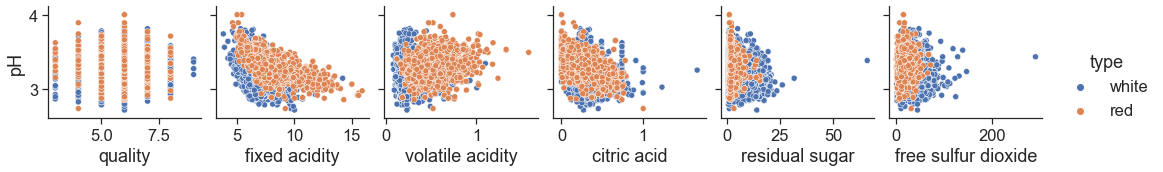

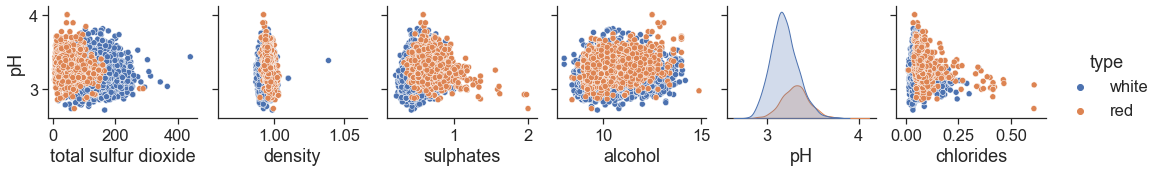

In [17]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['pH'],
             x_vars= ['quality', 'fixed acidity', 'volatile acidity', 
                      'citric acid', 'residual sugar', 'free sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['pH'],
             x_vars= ['total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'pH', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

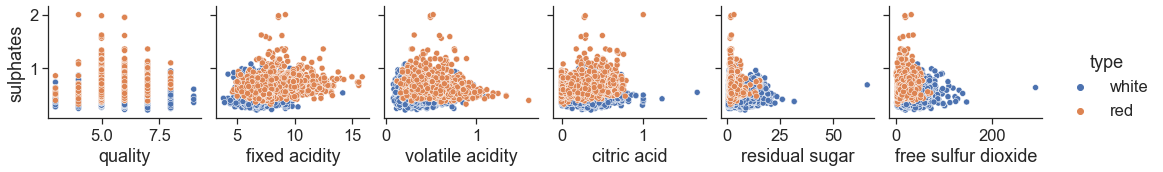

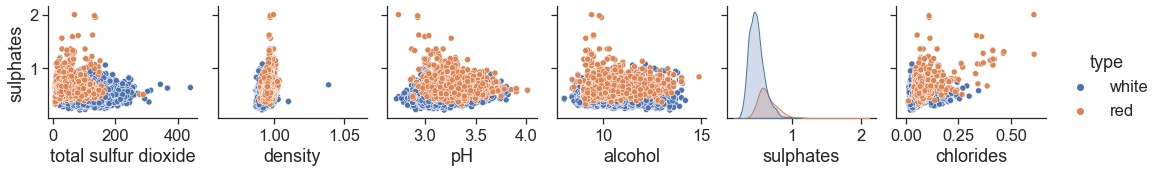

In [18]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['sulphates'],
             x_vars= ['quality', 'fixed acidity', 'volatile acidity', 
                      'citric acid', 'residual sugar', 'free sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['sulphates'],
             x_vars= ['total sulfur dioxide', 'density', 'pH', 'alcohol', 'sulphates', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

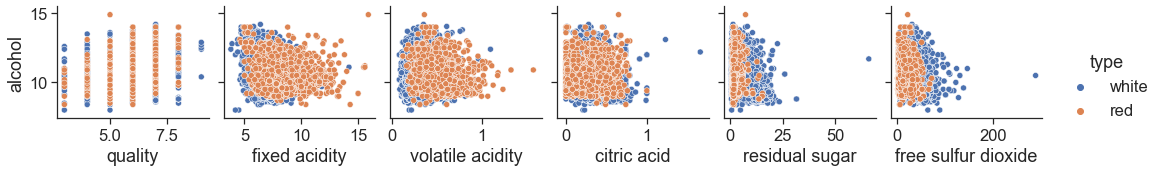

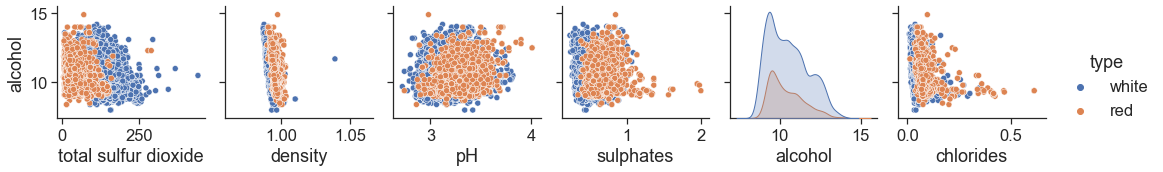

In [19]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['alcohol'],
             x_vars= ['quality', 'fixed acidity', 'volatile acidity', 
                      'citric acid', 'residual sugar', 'free sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['alcohol'],
             x_vars= ['total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'chlorides'],
             hue = 'type'))

<Figure size 720x720 with 0 Axes>

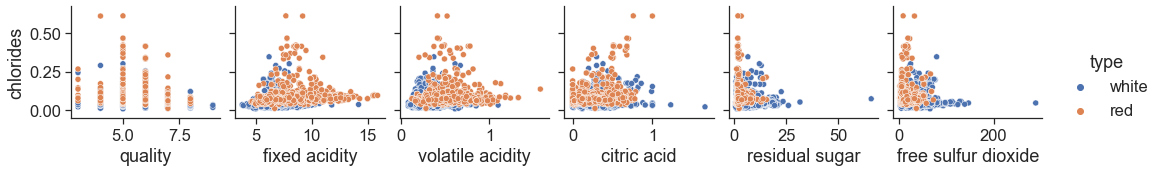

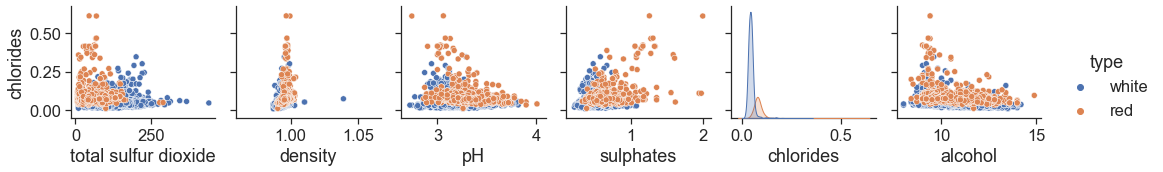

In [20]:
# Compare one variable to all the rest
plt.figure(figsize=(10,10))
sns.set(font_scale=4)
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
print(sns.pairplot(data= wine_df,
             y_vars=['chlorides'],
             x_vars= ['quality', 'fixed acidity', 'volatile acidity', 
                      'citric acid', 'residual sugar', 'free sulfur dioxide'],
             hue = 'type'))
print(sns.pairplot(data= wine_df,
             y_vars=['chlorides'],
             x_vars= ['total sulfur dioxide', 'density', 'pH', 'sulphates', 'chlorides', 'alcohol'],
             hue = 'type'))

# Notes on comparative data
- Quality: There are no clear trends within red and white wines for the quality, however a small trend can seen that quality decreases when volatile acidity, chlorides and sulphates increase. A positive trend can be seen where the quality is higher when alcohol increases.
- Fixed acidity: The fixed acidity is inversely proportional to the volatile acidity, residual sugar, free and total sulphur dioxide and chlorides.
- Volatile acidity: The volatile acidity shows similar properties to the fixed acidity where it is inversely proportional to the fixed acidity, citric acid, residual sugar, free and total sulphur dioxide and chlorides.
- Citric acid: The citric acid variable increases as the fixed acidity increases while volatile acidity decreases which indicates that citric acid contributes to fixed acidity.
- Residual sugar: The residual sugar decreases when the the volatile acidity, fixed acidity, citric acid, free sulphur dioxide, sulphates, alcohol and chlorides increases
- Free sulphur dioxide: An indirect relationship can be seen between the free sulphur dioxide and the fixed acidity, volatile acidity, citric acid, residual sugar, sulphates, alcohol and chlorides. However, the free sulphur dioxide increases with total sulphur dioxide which makes sense because the higher free sulphur dioxides are contributing to the larger total.
- Total sulphur dioxide: Similar to the free sulphur dioxide an indirect relationship can be seen between the total sulphur dioxide and the fixed acidity, volatile acidity, citric acid, residual sugar, sulphates, alcohol and chlorides with a direct relationship with the free sulphur dioxide
- Desnity: Not much can be seen with the desnity variable, however the more residual sugars there are the higher the desnity while the more alcohol that is present reduces the density
- pH: In regards to the pH measurement it can be seen that the presence of more fixed acidity, free sulphur dioxide, total sulphur dioxide, citric acid, sulphates and chlorides contributes to more acidic wine while volatile acidity increases the pH.
- Sulphates: The sulpahtes in wine decrease when volatile acidity, residual sugar, free sulphur dioxide and total sulphur dioxide increases. However, the sulphates increases when the amount of chlorides in the wine increases.
- Alcohol: From the data it can be seen that alcohol decreases with increasing fixed acidity, volatile acidity, residual sugars,free sulphur dioxide, total sulphur dioxide, density, sulphates and chlorides.
- Chlorides: It can be seen from the data that chlorides increase with fixed and volatile acidity up to a certain point (8 for fixed acidity and 0.5 for volatile acidity) where it then decreases. The chlorides in the wine increase with with an increase in citiric acid in red wines, however a decrease is seen in  white wines. A decrease in chlorides can be seen when residual sugar, free sulphur dioxide, total sulphur dioxide, and alcohol increases. Lastly an increase in sulphates results in higher amounts of chlorides.

From these results and observations it was decided that to assist with confimring the observations that a heat map be drawn for the white wines and red wines seperately 

In [21]:
# Create a datafrome for only white wines
# Filter the dataset
names = ["white"]
white_wine_df = wine_df[wine_df.type.isin(names)]

# Now remove the type column
white_wine_df = white_wine_df.drop('type', axis = 1)
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


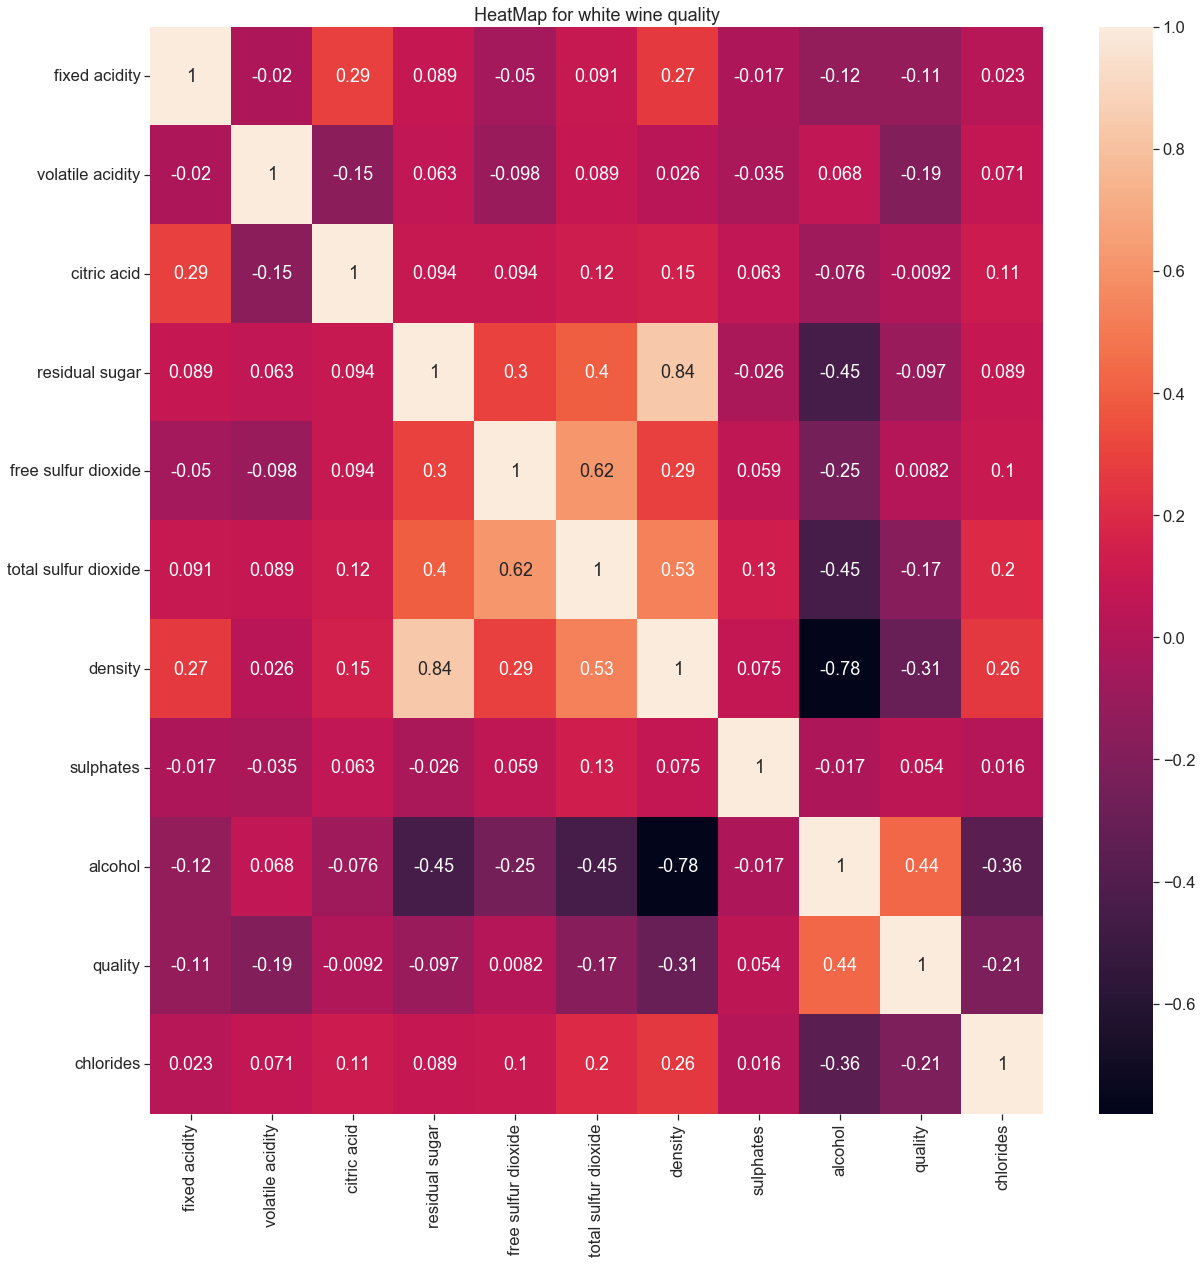

In [22]:
# Make a heatmap for the white wine data
# pH will be removed due to being a scale and as such the data does not give significant insight for a heatmap
plt.figure(figsize=(20,20))
wine_prop = white_wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 
                           'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide',
                           'density', 'sulphates', 'alcohol', 'quality', 'chlorides']]
corr_coeff_wine = wine_prop.corr()
sns.heatmap(corr_coeff_wine, annot=True)
plt.title( "HeatMap for white wine quality" )
plt.show()

From the heatmap constructed from the white wine data the following can be seen:
- The fixed acidity, citric acid and density are the most positively correlated (0.29 and 0.27 respectively) while alcohol is the most negatively correlated (-0.12) followed closely by quality (-0.11). Fixed acidity has the lowest correlation with chlorides (-0.017).
- Volatile acidity overall has very low correlation with other variables with having the highest negative correlation with citric acid (-0.15).
- Citric acid has the highest positive correlation with fixed acidity (0.29) while the most negative correlation is with volatile acidity (-0.15). In regards to other variables the citric acid has very low correlation where the correlation with quality is the closest (-0.0092) to 0.
- The residual sugar has the most positive correlation with density (0.84) while the most negative correlation is with alcohol (-0.45). The lowest correlation can be seen with sulphates (-0.026)
- The free sulphur dioxide has a very high positive correlation with total sulphur dioxide (0.62) while the most negative correlation is with alcohol (-0.25). The lowest correlation can be seen with quality (0.0082).
- The total sulphur dioxide is the most positively correlated to free sulphur dioxide (0.62) while also the most negatively correlated to alcohol (-0.45). The lowest correlation can also be seen with volatile acidity (0.089).
- Density can be seen to be the most positively correltated with residual sugar (0.84) while being the most negatively correlated with alcohol (-0.78). The lowest correlation can be seen with volatile acidity (0.026).
- Sulphates can be seen to have very low correltion with most of the variables with the highest positive correlation with total sulphur dioxide.
- Alcohol has the the most positive correlation with quality (0.44) and the most negative correlation with density (-0.78). The lowest correlation can be seen with sulphates (-0.017)
- The quality has the highest positive correlation with alcohol (0.44) while having the most  negative correlation with density (-0.31). The lowest correlation can be seen with free sulphur dioxide (0.0082).
- The chlorides can be seen to be the most positive correlated with density (0.26) and the most negative correlation is with alcohol (-0.36). The lowest correlation can be seen with sukphates (0.016).

In [23]:
# Create a datafrome for only red wines
# Filter the dataset
# pH will be removed due to being a scale and as such the data does not give significant insight for a heatmap
names = ["red"]
red_wine_df = wine_df[wine_df.type.isin(names)]

# Now remove the type column
red_wine_df = red_wine_df.drop('type', axis = 1)
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


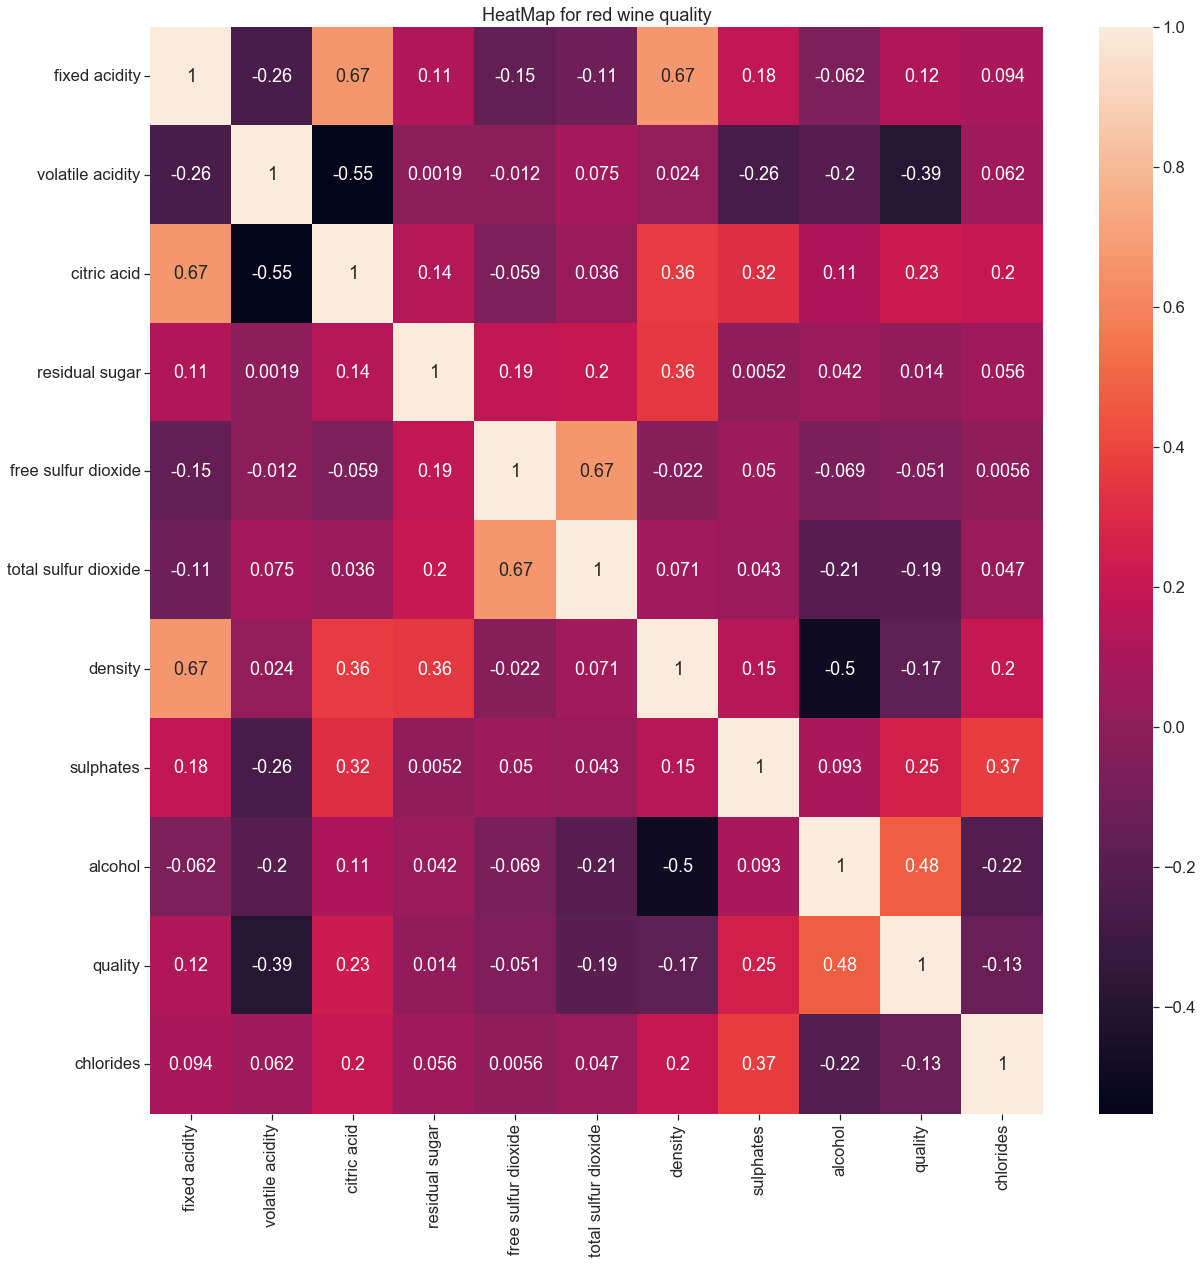

In [24]:
# Make a heatmap for the red wine data
plt.figure(figsize=(20,20))
wine_prop = red_wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 
                           'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide',
                           'density', 'sulphates', 'alcohol', 'quality', 'chlorides']]
corr_coeff_wine = wine_prop.corr()
sns.heatmap(corr_coeff_wine, annot=True)
plt.title( "HeatMap for red wine quality" )
plt.show()

From the heatmap constructed from the white wine data the following can be seen:

- The fixed acidity, citric acid and density are the most positively correlated (0.67 each) while volatile acidity is the most negatively correlated (-0.26). Fixed acidity has the lowest correlation with alcohol(-0.096) and quality (-0.077).
- Volatile acidity has the most positive correlation with total sulphur dioxide (0.075) while the most negative correlation is with citric acid (-0.55) just like the fixed acidity. The fixed acidity has the lowest correlation with residual sugar (0.0019)
- Citric acid has the highest positive correlation with fixed acidity (0.67) while the most negative correlation is with volatile acidity (-0.55). In regards to other variables the citric acid has very low correlation with total sulphur dioxide (0.036).
- The residual sugar has the most positive correlation with density (0.36) and has no negative correlations. The lowest correlation can be seen with volatile acidity (-0.0019).
- The free sulphur dioxide has a very high positive correlation with total sulphur dioxide (0.67) while the most negative correlation is with fixed acidity (-0.15). The lowest correlation can be seen with volatile acidity (-0.012).
- The total sulphur dioxide is the most positively correlated to free sulphur dioxide (0.67) while also the most negatively correlated to alcohol (-0.21). The lowest correlation can also be seen with citric acid (0.036).
- Density can be seen to be the most positively correltated with fixed acidity (0.67) while being the most negatively correlated with alcohol (-0.5). The lowest correlation can be seen with free sulphur dioxide (-0.022).
- Sulphates can be seen to be the most positively correlated with chlorides (0.37) and the most negatively correlated with volatile acidity (-0.26). In general however sulphates seem to have very low correlation with residual sugar (0.0052).
- Alcohol has the the most positive correlation with quality (0.48) and the most negative correlation with density (-0.5). The lowest correlation can be seen with residual sugar (0.042)
- The quality has the highest positive correlation with alcohol (0.48) while having the most negative correlation with volatile acidity (-0.39). The lowest correlation can be seen with residual sugar (0.014).
- The chlorides can be seen to be the most positive correlated with sulphates (0.37) and the most negative correlation is with alcohol (-0.22). The lowest correlation can be seen with free sulphur dioxide (0.0056).